In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,MaxPool2D,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [4]:
physical_device=tf.config.experimental.list_physical_devices('GPU')
print("No. of GPUs Available: ",len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

No. of GPUs Available:  1


RuntimeError: Physical devices cannot be modified after being initialized

In [5]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [6]:
trainY = tf.keras.utils.to_categorical(trainy,10)
testY = tf.keras.utils.to_categorical(testy,10)

In [7]:
trainY[0].shape

(10,)

In [8]:
train_norm_x= trainX.astype('float32')
test_norm = testX.astype('float32')

In [9]:
train_norm_x/=255

In [8]:
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [9]:
vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [10]:
model=Sequential()
for layer in vgg_layers.layers[:]:
    model.add(layer)

In [11]:
for layer in model.layers:
    layer.trainable = False

In [12]:
model.add(Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         2

In [36]:
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(32,32,3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    Flatten(),
])

In [37]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 64)       

In [38]:
model_1.add(tf.keras.layers.Dense(512, activation='relu'))
model_1.add(tf.keras.layers.Dense(10,activation="softmax"))

In [39]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
hist_1=model_1.fit(x=train_norm_x,y=trainY,batch_size=32,validation_split=0.1,epochs=20,verbose=1)

Epoch 1/20
1407/1407 [==============================] - 50s 35ms/step - loss: 1.6170 - accuracy: 0.4178 - val_loss: 1.2303 - val_accuracy: 0.5664
Epoch 2/20
1407/1407 [==============================] - 50s 35ms/step - loss: 1.0561 - accuracy: 0.6256 - val_loss: 1.2521 - val_accuracy: 0.5872
Epoch 3/20
1407/1407 [==============================] - 50s 35ms/step - loss: 0.8333 - accuracy: 0.7105 - val_loss: 0.8397 - val_accuracy: 0.7120
Epoch 4/20
1407/1407 [==============================] - 51s 36ms/step - loss: 0.6823 - accuracy: 0.7644 - val_loss: 0.7607 - val_accuracy: 0.7422
Epoch 5/20
1407/1407 [==============================] - 49s 35ms/step - loss: 0.5671 - accuracy: 0.8055 - val_loss: 0.6435 - val_accuracy: 0.7868
Epoch 6/20
1407/1407 [==============================] - 49s 35ms/step - loss: 0.4816 - accuracy: 0.8343 - val_loss: 0.7748 - val_accuracy: 0.7478
Epoch 7/20
1407/1407 [==============================] - 50s 36ms/step - loss: 0.3852 - accuracy: 0.8688 - val_loss: 0.7566 -

In [49]:
import os.path
if os.path.isfile('D:/datasetcollection/models/cifar.h5') is False:
    model_1.save('D:/datasetcollection/cifar.h5')

In [1]:
from tensorflow.keras.models import load_model
new_model=load_model('D:/datasetcollection/cifar.h5')

In [2]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 64)       

In [10]:
test_x= testX.astype('float32')
test_y = testy.astype('float32')

In [12]:
test_y=tf.keras.utils.to_categorical(test_y,10)

In [11]:
test_x/=255

In [16]:
test_y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
new_model.fit(x=test_x,y=test_y,batch_size=32,epochs=20,verbose=1)

Epoch 1/20
313/313 [==============================] - 11s 35ms/step - loss: 0.1667 - accuracy: 0.9588
Epoch 2/20
313/313 [==============================] - 11s 34ms/step - loss: 0.0375 - accuracy: 0.9885
Epoch 3/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0148 - accuracy: 0.9957
Epoch 4/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 5/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0058 - accuracy: 0.9983
Epoch 6/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 7/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0375 - accuracy: 0.9890
Epoch 8/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0238 - accuracy: 0.9925
Epoch 9/20
313/313 [==============================] - 10s 33ms/step - loss: 0.0364 - accuracy: 0.9890
Epoch 10/20
313/313 [==============================] - 10s 33ms/step - loss: 0.037

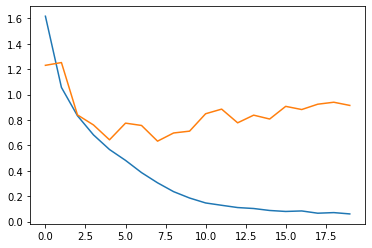

In [52]:
import matplotlib.pyplot as plt
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])

In [ ]:
trainY.shape

In [ ]:
train_norm_x.shape

In [21]:
from numpy import genfromtxt
my_data = genfromtxt('https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv', delimiter=',',skip_header=1)

In [22]:
my_data=my_data.astype('float32')

In [23]:
my_data=my_data/255

In [24]:
my_data=my_data.reshape(2000,32,32,3)

In [25]:
predictions_1 = new_model.predict(x=my_data, verbose=0)

In [26]:
p=np.round(predictions_1)

In [27]:
pi=[]
for i in range(len(p)):
    pi.append(np.argmax(p[i]))

In [48]:
import pandas as pd
res = pd.DataFrame(pi) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
 # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_1.csv") 